In [41]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
import math
import datetime
import platform

print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)
!pip show keras

Python version: 3.12.7
Tensorflow version: 2.18.0
Name: keras
Version: 3.7.0
Summary: Multi-backend Keras
Home-page: 
Author: 
Author-email: Keras team <keras-users@googlegroups.com>
License: Apache License 2.0
Location: C:\Users\somes\anaconda3\Lib\site-packages
Requires: absl-py, h5py, ml-dtypes, namex, numpy, optree, packaging, rich
Required-by: tensorflow_intel


In [43]:
#Load the TensorBoard notebook extension.
# %reload_ext tensorboard
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [45]:
#Load the data
mnist_dataset = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist_dataset.load_data()

In [47]:
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

# Purpose: Confirms the shape of training and testing datasets. MNIST dataset should have:
# x_train: (60000, 28, 28)
# y_train: (60000,)
# x_test: (10000, 28, 28)
# y_test: (10000,)

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


In [49]:
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = x_train.shape
IMAGE_CHANNELS = 1
print('IMAGE_WIDTH:', IMAGE_WIDTH)
print('IMAGE_HEIGHT:', IMAGE_HEIGHT)
print('IMAGE_CHANNELS:', IMAGE_CHANNELS)


IMAGE_WIDTH: 28
IMAGE_HEIGHT: 28
IMAGE_CHANNELS: 1


In [51]:
#Explore the data
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


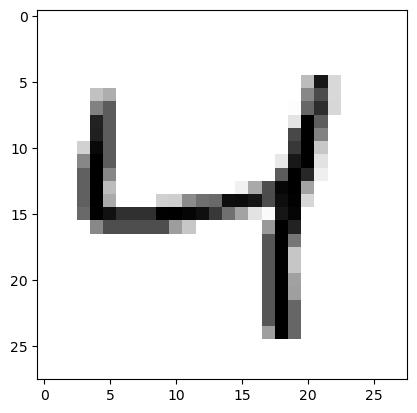

In [53]:
plt.imshow(x_train[2], cmap=plt.cm.binary)
plt.show()

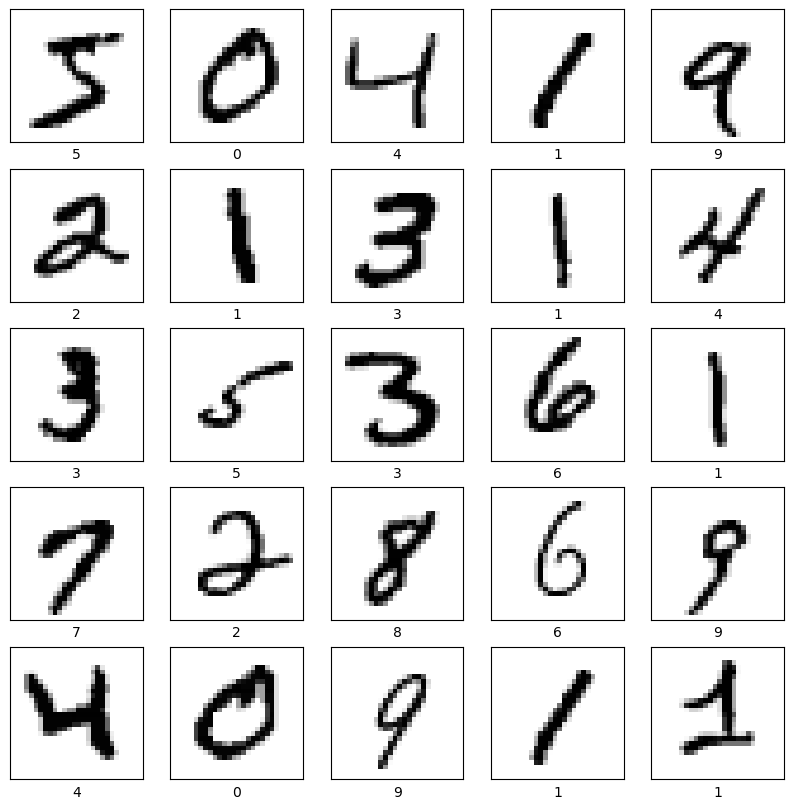

In [55]:
numbers_to_display = 25
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10,10))
for i in range(numbers_to_display):
  plt.subplot(num_cells, num_cells, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.xlabel(y_train[i])
plt.show()

# Purpose: Visualizes a grid of 25 images along with their labels (y_train[i]).
# Explanation:
# math.ceil(math.sqrt(numbers_to_display)): Calculates grid size to make it square.
# plt.subplot: Creates subplots for each image.

In [56]:
# Neural Network for Digit Classification
# The goal is to classify handwritten digits (0-9) using the MNIST dataset, leveraging a Convolutional Neural Network (CNN). Here's the process:

# Input Data:

# Each image is a 28x28 grayscale matrix.
# Preprocess the data (normalize to [0,1] and reshape to (28,28,1)).
# Model Architecture:

# Convolutional Layers:
# Extract features like edges and textures.
# Use filters and ReLU activation for non-linearity.

# Pooling Layers:
# Reduce dimensionality while preserving features.
# Commonly, max pooling is used.

# Flattening:
# Converts 2D feature maps into 1D arrays for the dense layers.

# Dense Layers:
# Fully connected layers for classification.

# Output Layer:
# 10 neurons (one for each digit).

# Softmax activation for probability distribution.

# Loss and Optimization:
# Use categorical_crossentropy for multi-class classification.

# Optimizer: Adam (adaptive learning).

# Evaluation:
# Compute precision, recall, and accuracy using classification_report.